# DA_Fall21_HW_3 Support Vector Machine and Decision Trees

# Due on 11/22 23:59 pm

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# make sure there is no missing values
orig_df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
had_affair         0
dtype: int64

In [3]:
# separate the features into categorical vs numerical
numerical_features = ['age', 'yrs_married', 'children']
categorical_features = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']
# collect all numerical features with the target variables first
numerical_df = orig_df[numerical_features + ['had_affair']]
numerical_df.head()

,age,yrs_married,children,had_affair
0,32.0,9.0,3.0,1
1,27.0,13.0,3.0,1
2,22.0,2.5,0.0,1
3,37.0,16.5,4.0,1
4,27.0,9.0,1.0,1


In [4]:
# create corresponding dummies variables
rate_marriage = pd.get_dummies(orig_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(orig_df['religious'],drop_first=True)
edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)

In [5]:
rate_marriage.head()

,2.0,3.0,4.0,5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [6]:
religious.head()

,2.0,3.0,4.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [7]:
# better to create a header to avoid same name
rate_marriage.columns = ['rate1','rate2','rate3','rate4']
rate_marriage

,rate1,rate2,rate3,rate4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6466,0,0,0,1
6467,0,0,1,0
6468,0,0,0,1
6469,0,0,0,1


In [8]:
religious.columns = ['re1','rel2','rel3']
religious.head()

,re1,rel2,rel3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


***Now we can concatnate the numerical features with rate_marriage and religious variabes***

In [9]:
df = pd.concat([numerical_df, rate_marriage, religious], axis=1)
df.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,rel3
0,32.0,9.0,3.0,1,0,1,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,0


### The goal of this homework is to practice building Support Vector Machine and Decision Tree Models.

### Part A: Support Vector Machine

***Follow the standard way of building a model and in particular,***
1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
2. Try different values of C-parameters (at least one small and one bigger value)
3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
4. Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters
Explain briefly the effect of using different parameter values


***Type your answers and code here***

1)

In [57]:
df.corr().filter(items=['had_affair']).sort_values('had_affair', ascending=False)

,had_affair
had_affair,1.000000
rate2,0.210025
yrs_married,0.203109
rate1,0.160799
children,0.159833
age,0.146519
re1,0.061692
rate3,0.000681
rel2,-0.051279
rel3,-0.102310


In [115]:
from sklearn.model_selection import train_test_split
X = df[['age','yrs_married','children','rate1','rate2','rate3','rate4','re1','rel2','rel3']].values
Y = df['had_affair'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [116]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [117]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [119]:
sdf = df[['yrs_married', 'children', 'had_affair']]
sdf

,yrs_married,children,had_affair
0,9.0,3.0,1
1,13.0,3.0,1
2,2.5,0.0,1
3,16.5,4.0,1
4,9.0,1.0,1
...,...,...,...
6466,13.0,2.0,0
6467,13.0,1.0,0
6468,2.5,0.0,0
6469,6.0,1.0,0


In [63]:
Y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

print(classification_report(Y_test,Y_pred))
print(model.score(X_test, Y_test))

print('R-squared:', metrics.r2_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363
R-squared: -0.24341423031676213


2)

In [89]:
model_big = svm.SVC(kernel='linear', C=2**5)
model_big.fit(X_train, Y_train)

SVC(C=32, kernel='linear')

In [92]:
Y_pred = model_big.predict(X_test)

In [93]:
print(classification_report(Y_test,Y_pred))
print(model_big.score(X_test, Y_test))

print('R-squared:', metrics.r2_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363
R-squared: -0.24341423031676213


In [94]:
model_small = svm.SVC(kernel='linear', C=2**(-5))
model_small.fit(X_train, Y_train)

SVC(C=0.03125, kernel='linear')

In [95]:
Y_pred = model_small.predict(X_test)

In [96]:
print(classification_report(Y_test,Y_pred))
print(model_small.score(X_test, Y_test))

print('R-squared:', metrics.r2_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363
R-squared: -0.24341423031676213


3)

In [108]:
gammas = [2**-5, 0.1 ,1 ,2]

---------------------------------------
c: 1	gamma: 0.03125

[[793  64]
 [303 114]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       857
           1       0.64      0.27      0.38       417

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.60      1274
weighted avg       0.70      0.71      0.67      1274

Mean Absolute Error: 0.2880690737833595
Mean Squared Error: 0.2880690737833595
Root Mean Squared Error: 0.5367206664395917
R-squared: -0.30833396293466975
---------------------------------------
c: 1	gamma: 0.1

[[783  89]
 [259 143]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       872
           1       0.62      0.36      0.45       402

    accuracy                           0.73      1274
   macro avg       0.68      0.63      0.63      1274
weighted avg       0.71      0.73      0.70      1274

Mean Absolute Error: 0.2731

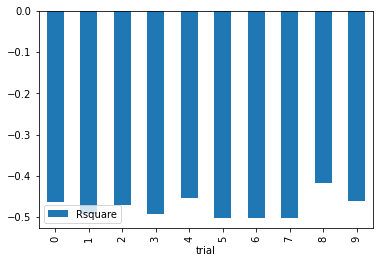

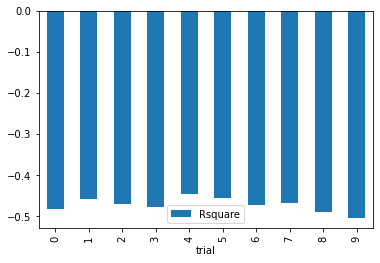

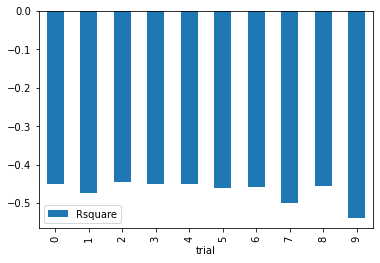

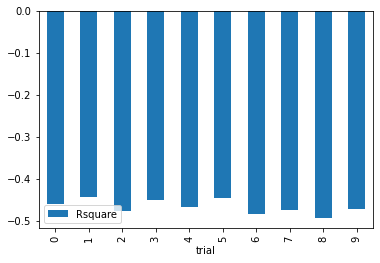

In [109]:
for g in gammas:
    svc = svm.SVC(kernel='rbf', probability=True, gamma=g)
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    model.score(X_test, Y_test)
    print('---------------------------------------')
    print('c: 1' + '\t' + 'gamma: ' +str(g) + '\n')
    model.score(X_test, Y_test)
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test,Y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
    print('R-squared:', metrics.r2_score(Y_test, Y_pred))
    rsquare = []
    for i in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
        model = svm.SVC()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
    rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
    rdf.plot.bar(x='trial', y='Rsquare')

4)

Out of all the models, the one with a Linear Kernel and default C and gamma had the highest f1 scores for finding no affiars and finding an affair. However, the models show that finding out if someone had an affair is not accurate, whereas finding out if a woman does not commit an affiar is accurate. The accuracy for the latter is lowest with a rbf kernel and a gamma of 2**-5. 

### Part B: Now we will try to fit the same dataset with Decision Trees

***Follow the standard way of building a model and in particular,***
1. Build a Decision Tree Classifier
2. Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
3. Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
4. Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above


***Type your code and answers here***

1)

In [110]:
from sklearn.tree import DecisionTreeClassifier
modeltree = DecisionTreeClassifier()
modeltree.fit(X_train,Y_train)

DecisionTreeClassifier()

2)

In [121]:
depth = [2, 3, 4]
crierion=['gini','entropy']

In [122]:
for d in depth:
    for c in crierion:
        modeltree = DecisionTreeClassifier(max_depth=d, criterion=c)
        modeltree.fit(X_train,Y_train)
        predictions = modeltree.predict(X_test)
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[773 112]
 [224 165]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363
---------------------------------
depth: 2	criterion: entropy

[[773 112]
 [224 165]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363
---------------------------------
depth: 3	criterion: gini

[[818  67]
 [264 125]]
              precision    recall  f1-score   support

 

3)

The models have lower f1 scores overall as the depth increases. It is noteable that the f1 score for predicting no affair rises slightly with increased depth, but the f1 score for having an affair decreases by .1 from depth 2 to 4. There appears to be no importance in choosing the criterion in this case. Since there is no importance, gini is the better choice because it is less computational heavy and still yields similar results. A max depth of 2 will also suffice.

4)

In [131]:
from sklearn import tree

In [132]:
model2 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(167.4, 181.2, 'X[6] <= 0.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(83.7, 108.72, 'X[5] <= 0.5\ngini = 0.491\nsamples = 2954\nvalue = [1679, 1275]'),
 Text(41.85, 36.23999999999998, 'gini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.445\nsamples = 1791\nvalue = [1193, 598]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 7.5\ngini = 0.298\nsamples = 2138\nvalue = [1749, 389]'),
 Text(209.25, 36.23999999999998, 'gini = 0.217\nsamples = 1277\nvalue = [1119, 158]'),
 Text(292.95, 36.23999999999998, 'gini = 0.393\nsamples = 861\nvalue = [630, 231]')]

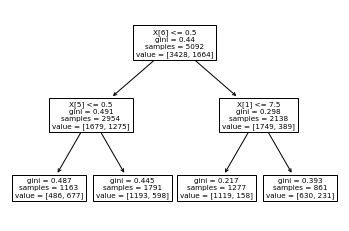

In [133]:
tree.plot_tree(model2)

In [134]:
model3 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model3.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\ngini = 0.491\nsamples = 2954\nvalue = [1679, 1275]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(20.925, 27.180000000000007, 'gini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 4.25\ngini = 0.445\nsamples = 1791\nvalue = [1193, 598]'),
 Text(104.625, 27.180000000000007, 'gini = 0.32\nsamples = 664\nvalue = [531, 133]'),
 Text(146.475, 27.180000000000007, 'gini = 0.485\nsamples = 1127\nvalue = [662, 465]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 7.5\ngini = 0.298\nsamples = 2138\nvalue = [1749, 389]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.217\nsamples = 1277\nvalue = [1119, 158]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0

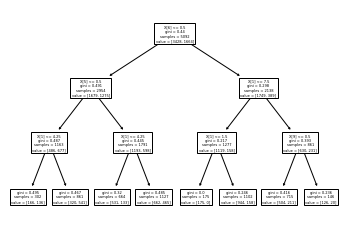

In [135]:
tree.plot_tree(model3)

In [136]:
model4 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model4.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

[Text(170.3892857142857, 195.696, 'X[6] <= 0.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(95.65714285714286, 152.208, 'X[5] <= 0.5\ngini = 0.491\nsamples = 2954\nvalue = [1679, 1275]'),
 Text(47.82857142857143, 108.72, 'X[1] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(23.914285714285715, 65.232, 'X[1] <= 1.5\ngini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(11.957142857142857, 21.744, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(35.871428571428574, 21.744, 'gini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(71.74285714285715, 65.232, 'X[9] <= 0.5\ngini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(59.785714285714285, 21.744, 'gini = 0.459\nsamples = 790\nvalue = [282, 508]'),
 Text(83.7, 21.744, 'gini = 0.498\nsamples = 71\nvalue = [38, 33]'),
 Text(143.4857142857143, 108.72, 'X[1] <= 4.25\ngini = 0.445\nsamples = 1791\nvalue = [1193, 598]'),
 Text(119.57142857142857, 65.232, 'X[2] <= 3.5\ngini = 0.32\nsamples = 664\n

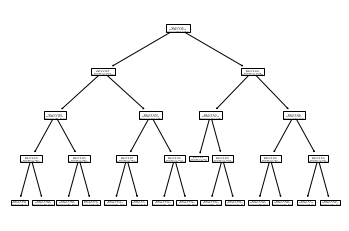

In [137]:
tree.plot_tree(model4)

5)

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred))
print(accuracy_score(Y_test, rfc_pred))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       885
           1       0.54      0.39      0.45       389

    accuracy                           0.71      1274
   macro avg       0.65      0.62      0.63      1274
weighted avg       0.69      0.71      0.70      1274

0.7119309262166404
[[825  60]
 [273 116]]


The f1 scores and accuracy are about the same as the other models. However, it does not "beat" any of the other models in those categories, so it does not seem to be a better model.

### Part C: Now finally create a dataframe including all other categorical variable and build decision tree model

In [142]:
occ.head()

,occ2,occ3,occ4,occ5,occ6
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [141]:
husb_occ.head()

,2.0,3.0,4.0,5.0,6.0
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


In [145]:
# Type your code here, fill in the missing code here

edu.columns = ['edu1','edu2','edu3','edu4','edu5']
occ.columns = ['occ1','occ2','occ3','occ4','occ5']
husb_occ.columns = ['h_occ1','h_occ2','h_occ3','h_occ4','h_occ5']
# ...

df2 = pd.concat([df, edu, occ, husb_occ], axis = 1)

df2.columns

Index(['age', 'yrs_married', 'children', 'had_affair', 'rate1', 'rate2',
       'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2', 'edu3', 'edu4',
       'edu5', 'occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'h_occ1', 'h_occ2',
       'h_occ3', 'h_occ4', 'h_occ5'],
      dtype='object')

In [146]:
df2.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,...,occ1,occ2,occ3,occ4,occ5,h_occ1,h_occ2,h_occ3,h_occ4,h_occ5
0,32.0,9.0,3.0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


***Use the same model as in Part B step 1 with this new dataframe. Comment on whether the additional variables help the model performance or not***

***Type your code and answers here***

In [147]:
X = df2.drop('had_affair', axis = 1)
Y = df2['had_affair'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [148]:
modeldf2 = DecisionTreeClassifier()
modeldf2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [149]:
predictions = modeldf2.predict(X_test)

print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[681 204]
 [230 159]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       885
           1       0.44      0.41      0.42       389

    accuracy                           0.66      1274
   macro avg       0.59      0.59      0.59      1274
weighted avg       0.65      0.66      0.66      1274

0.6593406593406593


The added variables did not help the model performance. The f1 scores are lower in this model after adding in the other variables.